<a href="https://colab.research.google.com/github/ArefPhD/A-program-to-retrive-citations-and-schaolar-page-of-authors/blob/master/Prediction_of_CMCs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

Saving molecules2.csv to molecules2.csv


In [2]:
pip install rdkit-pypi

     |████████████████████████████████| 22.5 MB 5.2 MB/s 


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rdkit
from rdkit.Chem import AllChem
from rdkit import Chem
from sklearn.preprocessing import OneHotEncoder


df=pd.read_csv("molecules2.csv")
df=df.dropna(how="all")
df=df.iloc[:,:3]
df["Nomenclature Name"]=df.iloc[:,2]
df["Molecular Structure"]=df.iloc[:,1]
df["CMC"]=df.iloc[:,0]
df=df[["Nomenclature Name","Molecular Structure","CMC"]]
df.head(10)

,Nomenclature Name,Molecular Structure,CMC
0,Poly(4-biphenyl acrylate),CCN1C=C[N+](COCCOC[N+]2=CN(CC)C=C2)=C1.[Cl- ]....,2.23
1,Poly(butyl acrylate),CCCCN1C=C[N+](COCCOC[N+]2=CN(CCCC)C=C2)=C1. [C...,2.41
2,Poly(sec-butyl acrylate),CCCCCCN1C=C[N+](COCCOC[N+]2=CN(CCCCCC)C=C 2)=C...,2.58
3,Poly(2-tertbutylphenyl acrylate),CCCCCCCN1C=C[N+](COCCOC[N+]2=CN(CCCCCCC)C =C2)...,2.65
4,Poly(4-tertbutylphenyl acrylate),CCCCCCCCN1C=C[N+](COCCOC[N+]2=CN(CCCCCCCC )C=C...,2.72
5,Poly(2-tertbutylphenyl acrylate),CCCCCCCCCN1C=C[N+](COCCOC[N+]2=CN(CCCCCCC CC)C...,2.81
6,Poly(4-tertbutylphenyl acrylate),CCCCCCCCCCN1C=C[N+](COCCOC[N+]2=CN(CCCCCC CCCC...,2.92
7,Poly(4-cyanobenzyl acrylate),CCCCCCCCCCCN1C=C[N+](COCCOC[N+]2=CN(CCCCC CCCC...,3.04
8,Poly(2-cyanoisobutyl acrylate),CCCCCCCCCCCCN1C=C[N+](COCCOC[N+]2=CN(CCCC CCCC...,3.15
9,Poly(2-cyanoethyl acrylate),CCCCCCCCCCCCCCN1C=C[N+](COCCOC[N+]2=CN(CC CCCC...,3.34


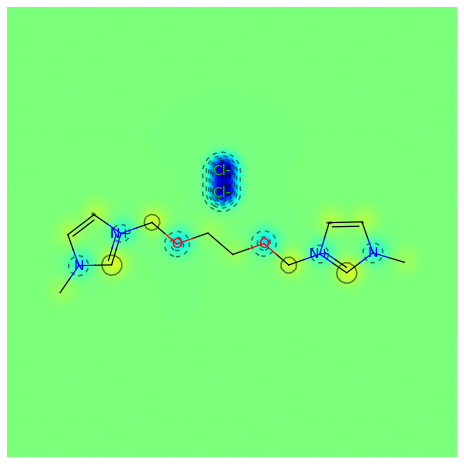

In [8]:
from rdkit.Chem.Draw import SimilarityMaps
mol = Chem.MolFromSmiles('CN1C=C[N+](COCCOC[N+]2=CN(C)C=C2)=C1.[Cl-].[Cl-] ')
AllChem.ComputeGasteigerCharges(mol)
contribs = [mol.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(mol.GetNumAtoms())]
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, contribs, colorMap='jet', contourLines=10)
AllChem.ComputeGasteigerCharges(mol)



In [9]:
def encoding(df):
  encoded=[]
  elements=[['c'], ['n'], ['o'], ['C'], ['N'], ['F'], ['='], ['O'], 
            ['('], [')'], ['1'],['2'],['#'],['Cl'],['/']]
  enc = OneHotEncoder(handle_unknown='ignore')
  enc.fit(elements)
  enc.categories_
  df1=df["Molecular Structure"].apply(lambda x: pd.Series(list(x)))
  for i in range(df1.shape[0]):
    x=enc.transform(pd.DataFrame(df1.iloc[i,:]).dropna(how="all").values).toarray()
    y=np.zeros(((df1.shape[1]-x.shape[0]),len(elements)))
    encoded.append(np.vstack((x,y)))
  return encoded

def encoded_generate_images(df):
  listt=encoding(df)
  plt.figure(figsize=(20,100))
  for i in range(len(listt)):
    plt.subplot(len(listt),5,i+1)
    plt.imshow(listt[i])

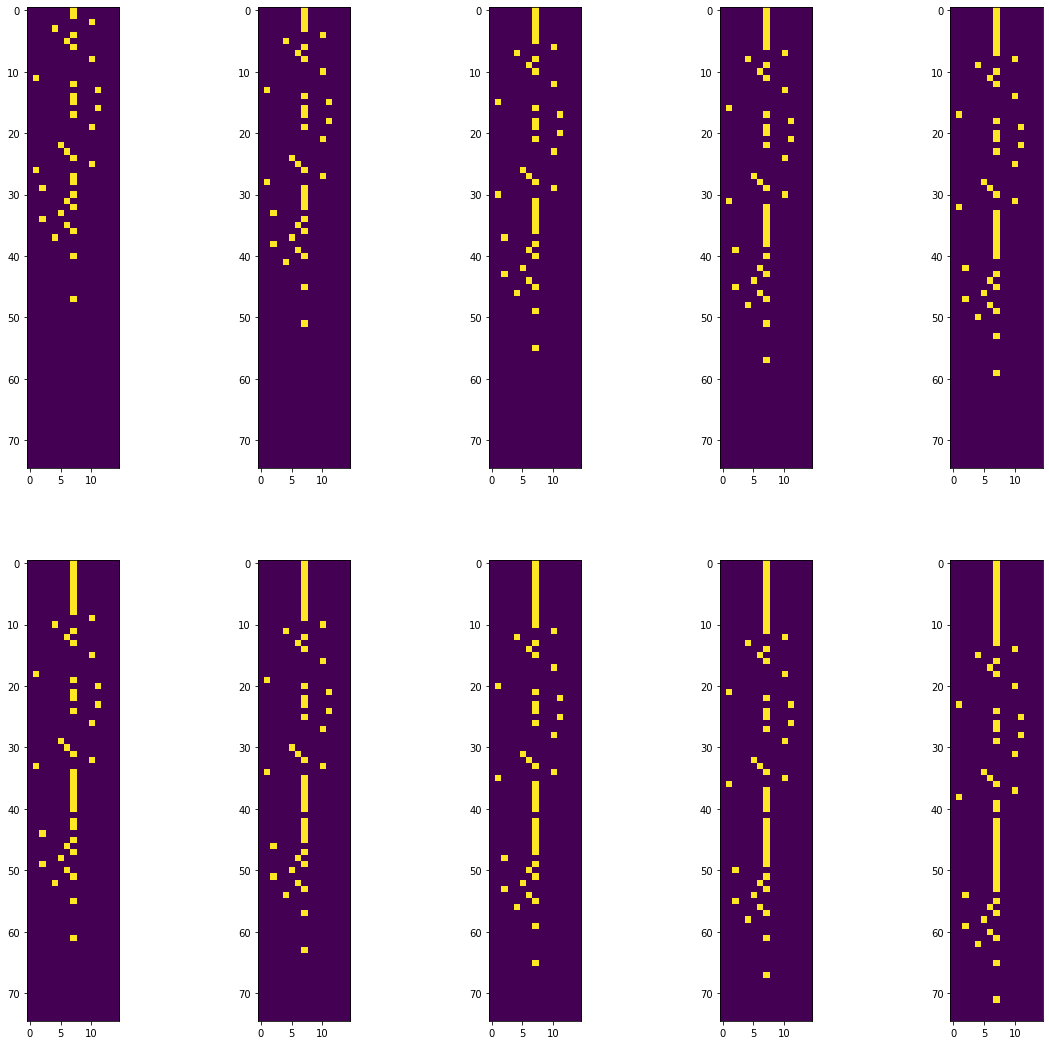

In [10]:
encoded_generate_images(df.head(10))

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense,MaxPool2D,Conv2D,Conv1D,Flatten,MaxPooling1D
from keras import optimizers
from keras.layers import Dropout

In [12]:
X=encoding(df)
X=np.array(X)
X.shape

(69, 90, 15)

In [14]:
Y=df["CMC"].values
Y.shape

(69,)

In [15]:
import tensorflow as tf

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=8, activation='relu',kernel_regularizer="l2", input_shape=(90, 15)))
model.add(MaxPooling1D(pool_size=5))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
optimizer=tf.keras.optimizers.Adam(lr=0.005)
model.compile(optimizer=optimizer, loss='mean_absolute_error')
Model=model.fit(x=X_train,y=y_train,epochs=50,batch_size=16,validation_split=0.2)
  


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
4/4 [==============================] - 3s 234ms/step - loss: 2.1872 - val_loss: 0.3865
Epoch 2/50
4/4 [==============================] - 0s 27ms/step - loss: 0.9389 - val_loss: 0.7051
Epoch 3/50
4/4 [==============================] - 0s 25ms/step - loss: 0.5718 - val_loss: 0.4486
Epoch 4/50
4/4 [==============================] - 0s 24ms/step - loss: 0.5719 - val_loss: 0.7003
Epoch 5/50
4/4 [==============================] - 0s 25ms/step - loss: 0.4412 - val_loss: 0.7719
Epoch 6/50
4/4 [==============================] - 0s 25ms/step - loss: 0.9563 - val_loss: 0.4309
Epoch 7/50
4/4 [==============================] - 0s 45ms/step - loss: 0.5703 - val_loss: 0.6938
Epoch 8/50
4/4 [==============================] - 0s 35ms/step - loss: 0.4610 - val_loss: 0.7836
Epoch 9/50
4/4 [==============================] - 0s 27ms/step - loss: 0.9721 - val_loss: 0.3296
Epoch 10/50
4/4 [==============================] - 0s 35ms/step - loss: 0.5433 - val_loss: 0.8438
Epoch 11/50
4/4 [===========

In [17]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 83, 128)           15488     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 16, 128)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 128)           0         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 50)                102450    
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                        

In [18]:
y_predtrain=model.predict(X_train)
y_predtest=model.predict(X_test)
MAE_test=abs(y_predtest.reshape(y_test.shape)-y_test).sum()/y_test.shape
MAE_train=abs(y_predtrain.reshape(y_train.shape)-y_train).sum()/y_train.shape
print("Mean Absolute Error on Training Set = ",MAE_train.item())
print("Mean Absolute Error on Test Set = ",MAE_test.item())

Mean Absolute Error on Training Set =  0.2196093151646276
Mean Absolute Error on Test Set =  0.1953375475747245


(7,)

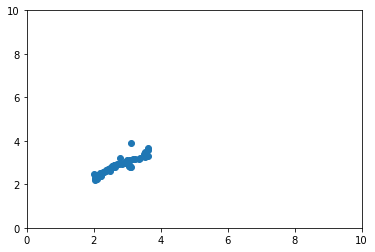

In [19]:
import matplotlib.pyplot as plt
plt.scatter(y_predtrain,y_train.reshape(62,1))
plt.xlim([0,10])
plt.ylim([0,10])
y_train.shape
y_test.shape


In [20]:
y_predtrain.reshape(62)
y_train.reshape(62)
import plotly.express as px
fig = px.scatter(x=y_predtrain.reshape(62), y=y_train.reshape(62))
fig.show()



In [21]:
import plotly.graph_objects as go
import numpy as np




fig = go.Figure()

fig.add_trace(go.Scatter(
    x=y_predtrain.reshape(62), y=y_train.reshape(62),
    name='sin',
    mode='markers',
    marker_color='rgba(100, 1, 0, .8)'))

fig.update_traces(mode='markers', marker_line_width=2, marker_size=5)
fig.update_layout(title='Styled Scatter',
                  yaxis_zeroline=False, xaxis_zeroline=False)
fig.show()


In [22]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=go.Scattergl(
    x = y_predtrain.reshape(62),
    y = y_train.reshape(62),
    mode='markers',
    marker=dict(
        color=np.random.randn(62),
        colorscale='Viridis',
        line_width=2
    )
))

fig.show()

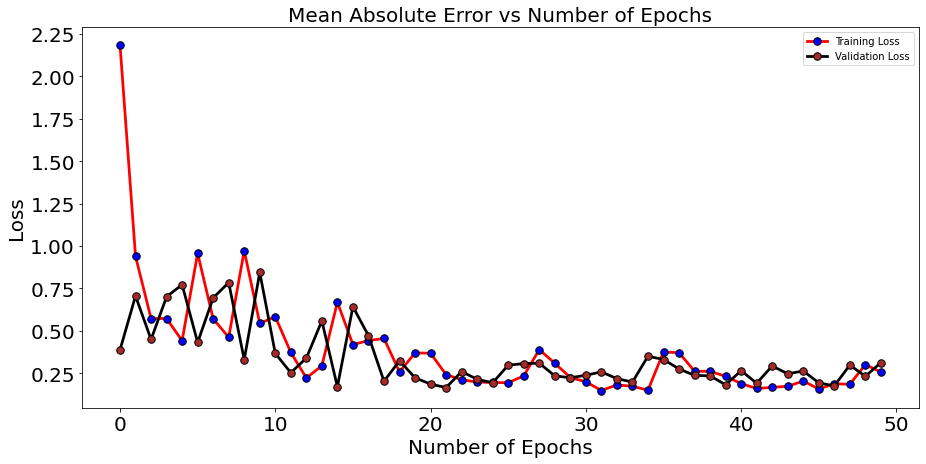

In [23]:
plt.figure(figsize=(15,7))
plt.plot(Model.history["loss"],color='r', linewidth=2.75, linestyle='-', marker='.', markersize=15,markerfacecolor='b',
         markeredgecolor='black',
         markeredgewidth=1,label="Training Loss")
plt.plot(Model.history['val_loss'],color='black', linewidth=2.75, linestyle='-', marker='.', markersize=15,markerfacecolor='brown',
         markeredgecolor='black',
         markeredgewidth=1,label="Validation Loss")
plt.xlabel("Number of Epochs",size=20,color="black")
plt.ylabel("Loss",size=20,color="black")
plt.xticks(size=20)
plt.yticks(size=20)
plt.title("Mean Absolute Error vs Number of Epochs",size=20)
plt.legend()
plt.show()

### Neural Network using Bond Features

In [24]:
mw={"C":12,"c":12,"O":16,"o":16,"N":14,"F":19}
def Molecular_Weight(text):
  Mass=[]
  for elements in text:
    if elements=="C":
      Mass.append(mw[elements])
    elif elements=="c":
      Mass.append(mw[elements])
    elif elements=="o":
      Mass.append(mw[elements])
    elif elements=="O":
      Mass.append(mw[elements])
    elif elements=="F":
      Mass.append(mw[elements])
    elif elements=="N":
      Mass.append(mw[elements])  
  return sum(Mass)

In [25]:
df["C_Atoms_Ring"]=df["Molecular Structure"].apply(lambda x: x.count('c'))
df["C_Atoms_Chain"]=df["Molecular Structure"].apply(lambda x: x.count('C'))
df["O_Atoms_Chain"]=df["Molecular Structure"].apply(lambda x: x.count('O'))
df["O_Atoms_Ring"]=df["Molecular Structure"].apply(lambda x: x.count('o'))
df["N_Double Bonds_Ring"]=df["Molecular Structure"].apply(lambda x: x.count('c')/2)
df["N_Double Bonds_Chain"]=df["Molecular Structure"].apply(lambda x: x.count('='))
df["Nitrogen_Atoms"]=df["Molecular Structure"].apply(lambda x: x.count('N'))
df["F_Atoms"]=df["Molecular Structure"].apply(lambda x: x.count('F'))
df["MW"]=df["Molecular Structure"].apply(lambda x: Molecular_Weight(x))
df["Total Number of Atoms"]=df["Molecular Structure"].apply(lambda x: len(x))
df["Number of Single Bonds"]=df["Molecular Structure"].apply(lambda x:len(x)-x.count('=')-1)

In [27]:
df.head()

,Nomenclature Name,Molecular Structure,CMC,C_Atoms_Ring,C_Atoms_Chain,O_Atoms_Chain,O_Atoms_Ring,N_Double Bonds_Ring,N_Double Bonds_Chain,Nitrogen_Atoms,F_Atoms,MW,Total Number of Atoms,Number of Single Bonds
0,Poly(4-biphenyl acrylate),CCN1C=C[N+](COCCOC[N+]2=CN(CC)C=C2)=C1.[Cl- ]....,2.23,0,16,2,0,0.0,4,4,0,280,51,46
1,Poly(butyl acrylate),CCCCN1C=C[N+](COCCOC[N+]2=CN(CCCC)C=C2)=C1. [C...,2.41,0,20,2,0,0.0,4,4,0,328,55,50
2,Poly(sec-butyl acrylate),CCCCCCN1C=C[N+](COCCOC[N+]2=CN(CCCCCC)C=C 2)=C...,2.58,0,24,2,0,0.0,4,4,0,376,59,54
3,Poly(2-tertbutylphenyl acrylate),CCCCCCCN1C=C[N+](COCCOC[N+]2=CN(CCCCCCC)C =C2)...,2.65,0,26,2,0,0.0,4,4,0,400,61,56
4,Poly(4-tertbutylphenyl acrylate),CCCCCCCCN1C=C[N+](COCCOC[N+]2=CN(CCCCCCCC )C=C...,2.72,0,28,2,0,0.0,4,4,0,424,63,58


In [30]:
X=df.loc[:,"MW":]
Y=df[["CMC"]]

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X.shape

(69, 3)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [33]:
model = Sequential()
model.add(Dense(40, input_dim=3, activation="relu",kernel_regularizer="l2"))
#model.add(Dense(20,activation="relu",kernel_regularizer="l2"))
model.add(Dense(10,activation="relu",kernel_regularizer="l2"))
#model.add(Dense(12, activation="relu",kernel_regularizer="l2"))
model.add(Dense(1))

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 40)                160       
                                                                 
 dense_3 (Dense)             (None, 10)                410       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 581
Trainable params: 581
Non-trainable params: 0
_________________________________________________________________


In [35]:
optimizer=tf.keras.optimizers.Adam(lr=0.09)
model.compile(optimizer=optimizer, loss='mean_absolute_error')
Model=model.fit(x=X_train,y=y_train,epochs=70,batch_size=64,validation_split=0.1)
  

Epoch 1/70


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



1/1 [==============================] - 1s 656ms/step - loss: 3.0121 - val_loss: 1.9859
Epoch 2/70
1/1 [==============================] - 0s 38ms/step - loss: 2.0952 - val_loss: 0.9460
Epoch 3/70
1/1 [==============================] - 0s 34ms/step - loss: 1.3247 - val_loss: 2.2603
Epoch 4/70
1/1 [==============================] - 0s 34ms/step - loss: 2.0551 - val_loss: 1.0281
Epoch 5/70
1/1 [==============================] - 0s 35ms/step - loss: 1.0680 - val_loss: 0.8151
Epoch 6/70
1/1 [==============================] - 0s 36ms/step - loss: 1.0167 - val_loss: 0.8289
Epoch 7/70
1/1 [==============================] - 0s 38ms/step - loss: 0.8693 - val_loss: 0.5053
Epoch 8/70
1/1 [==============================] - 0s 39ms/step - loss: 0.4931 - val_loss: 0.7218
Epoch 9/70
1/1 [==============================] - 0s 32ms/step - loss: 0.7185 - val_loss: 0.5545
Epoch 10/70
1/1 [==============================] - 0s 37ms/step - loss: 0.5318 - val_loss: 0.3854
Epoch 11/70
1/1 [======================

In [36]:
y_predtrain=model.predict(X_train)
y_predtest=model.predict(X_test)
print("Train Error = ",abs(y_predtrain.reshape(55)-y_train.values.reshape(55)).sum()/55)
print("Unseen Test Error = ",abs(y_predtest.reshape(14)-y_test.values.reshape(14)).sum()/14)

Train Error =  0.11844879549199887
Unseen Test Error =  0.1775825377873012


In [37]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=go.Scattergl(
    x = y_predtrain.reshape(55),
    y = y_train.values.reshape(55),
    mode='markers',
    marker=dict(
        color=np.random.randn(14),
        colorscale='Viridis',
        line_width=2
    )
))

fig.show()

In [39]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=go.Scattergl(
    x = y_predtest.reshape(14),
    y = y_test.values.reshape(14),
    mode='markers',
    marker=dict(
        color=np.random.randn(55),
        colorscale='Viridis',
        line_width=2
    )
))

fig.show()